In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import functions as f

In [2]:
img1 = Image.open("nikol.png")
img1.load()
img2 = Image.open("quay.jpg")
img2.load()
img3 = Image.open("lenna.png")
img3.load()
img4 = Image.open("scan.jpg")
img4.load()

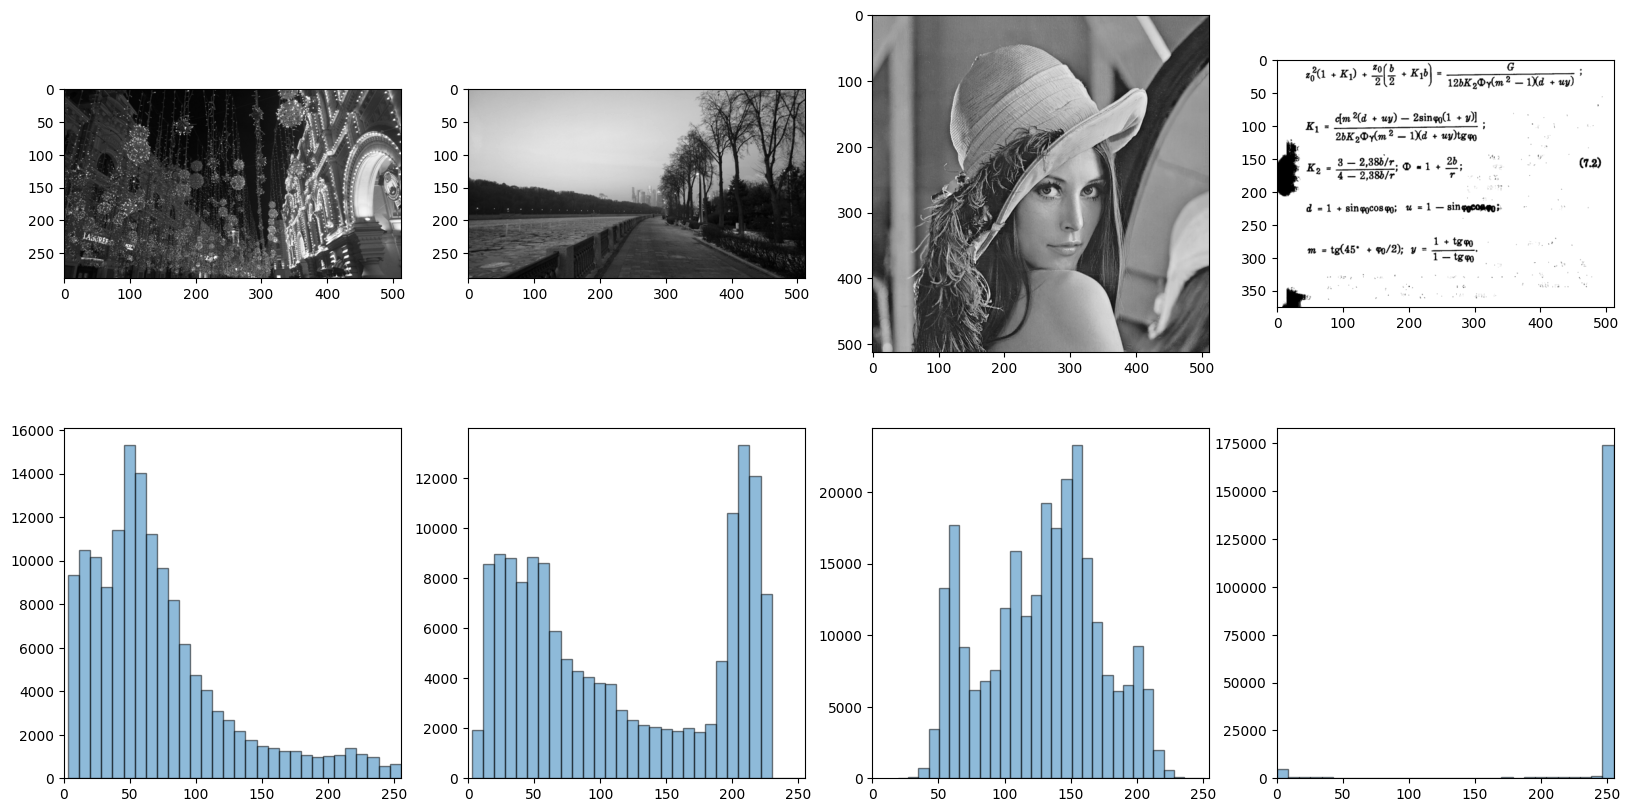

In [3]:
images = [img1, img2, img3, img4]

for i in range(len(images)):
    images[i] = images[i].resize(f.calc_size(images[i].size, 512))
    
gray_images = []
for img in images:
    gray_images.append(f.make_grey(img))

f.draw_plots(gray_images, (20, 10))

In [4]:
def calc_g_lut(g):
    lut = []
    for i in range(256):
        lut.append( ((i/255)**g) * 255 )
    return lut

In [5]:
def g_cor(img, g):
    lut = calc_g_lut(g)
    new_img = []
    for x in img:
        new_x = []
        for y in x:
            new_x.append(lut[int(y)])
        new_img.append(new_x)
    return new_img

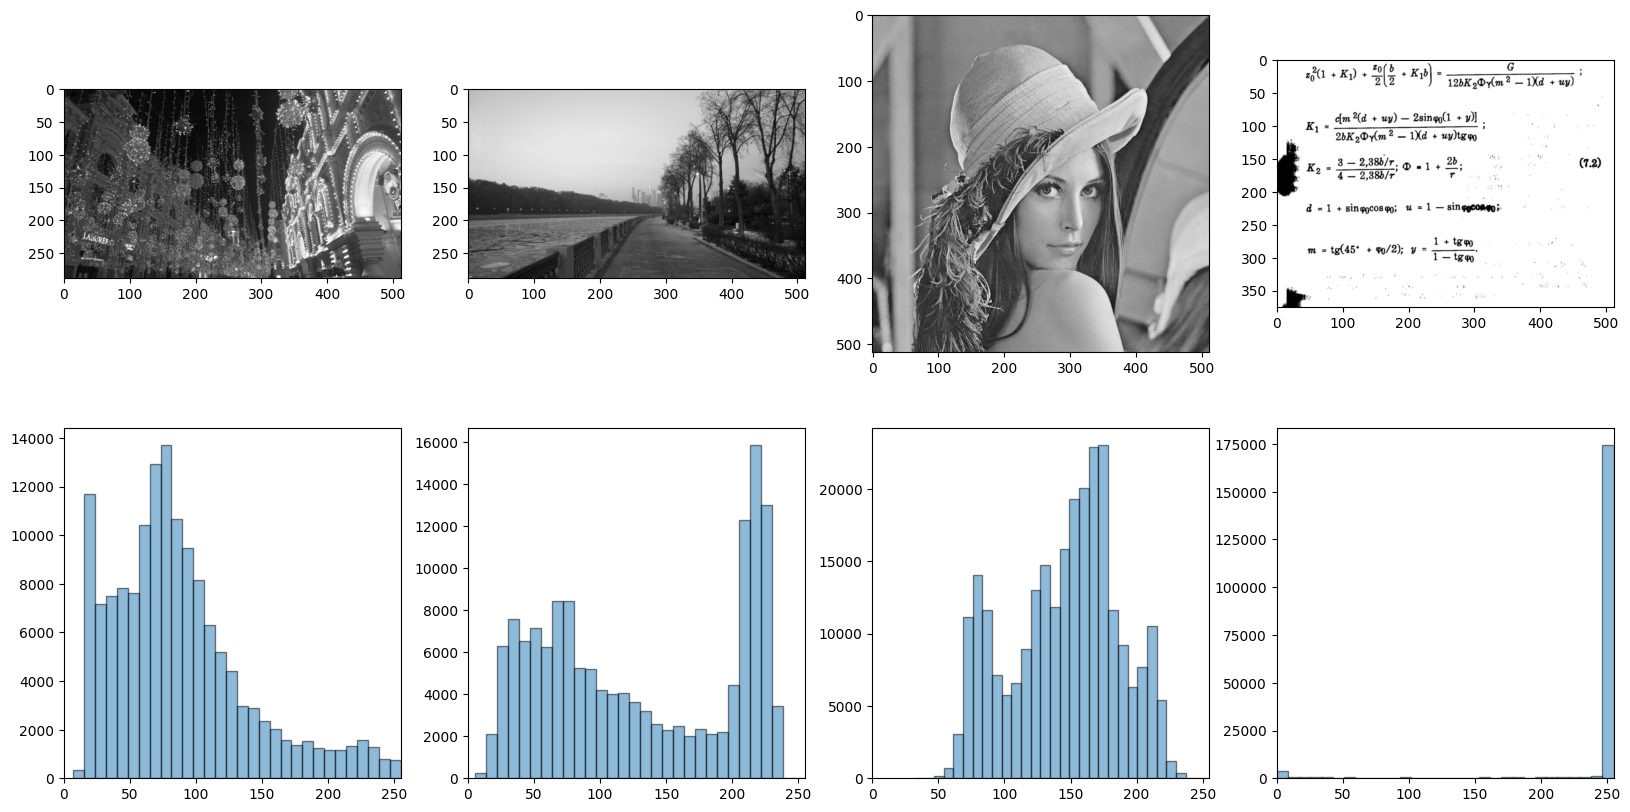

In [6]:
gamma = 0.8
images_g = []
for i in range(4):
    images_g.append(g_cor(gray_images[i], gamma))

f.draw_plots(images_g, (20, 10), bins=30)

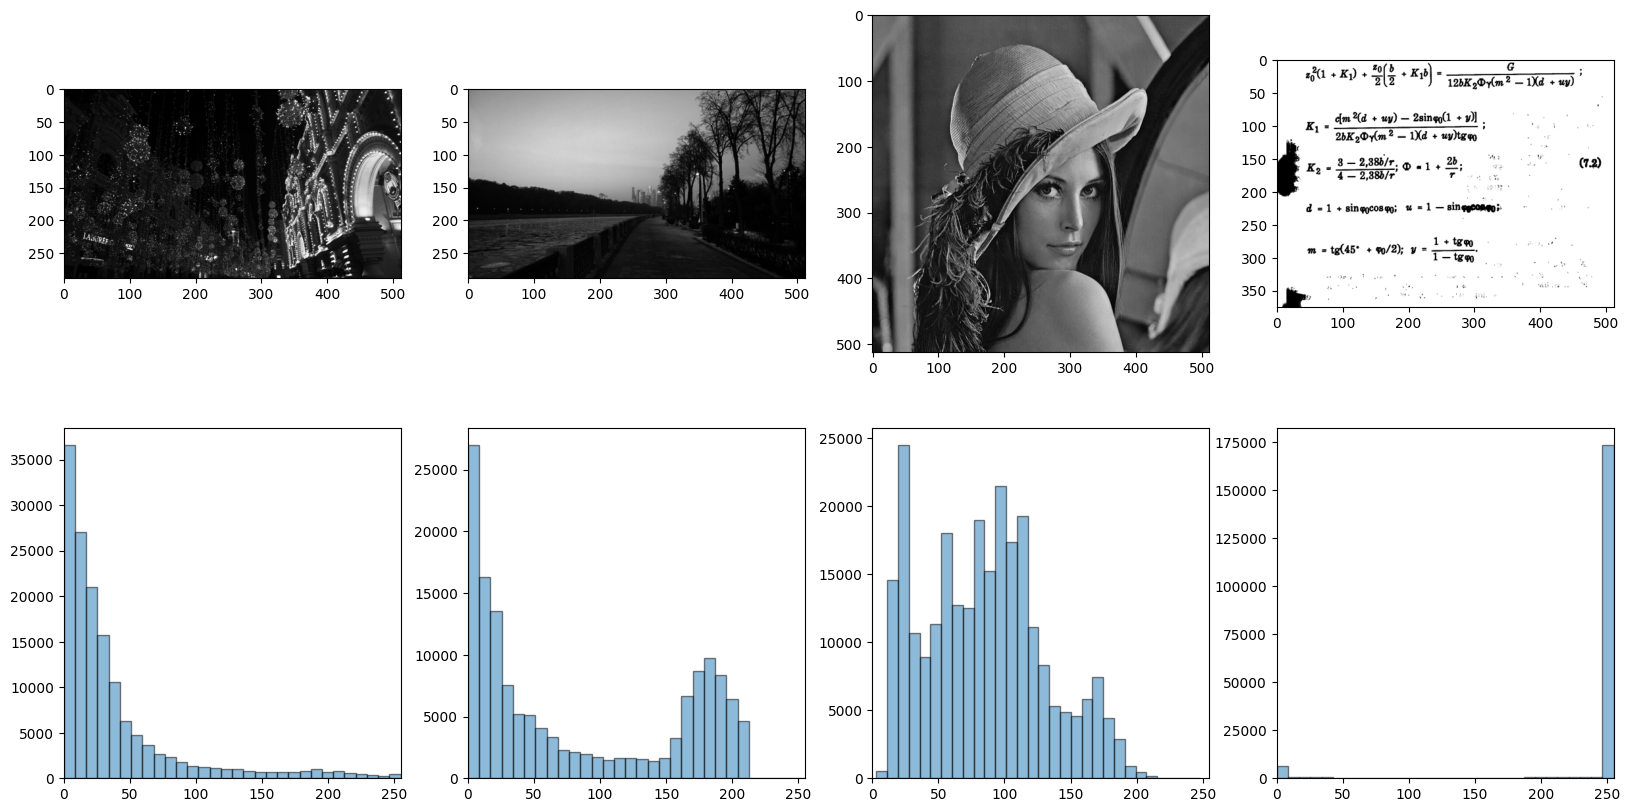

In [7]:
gamma = 1.7
images_g = []
for i in range(4):
    images_g.append(g_cor(gray_images[i], gamma))

f.draw_plots(images_g, (20, 10), bins=30)

In [8]:
images_g_compare = []
for g in np.arange(0.5, 2.1, 0.1):
    images_g_c = []
    for i in range(4):
        if g != 1:
            images_g_c.append(g_cor(gray_images[i], g))
    images_g_compare.append(images_g_c)

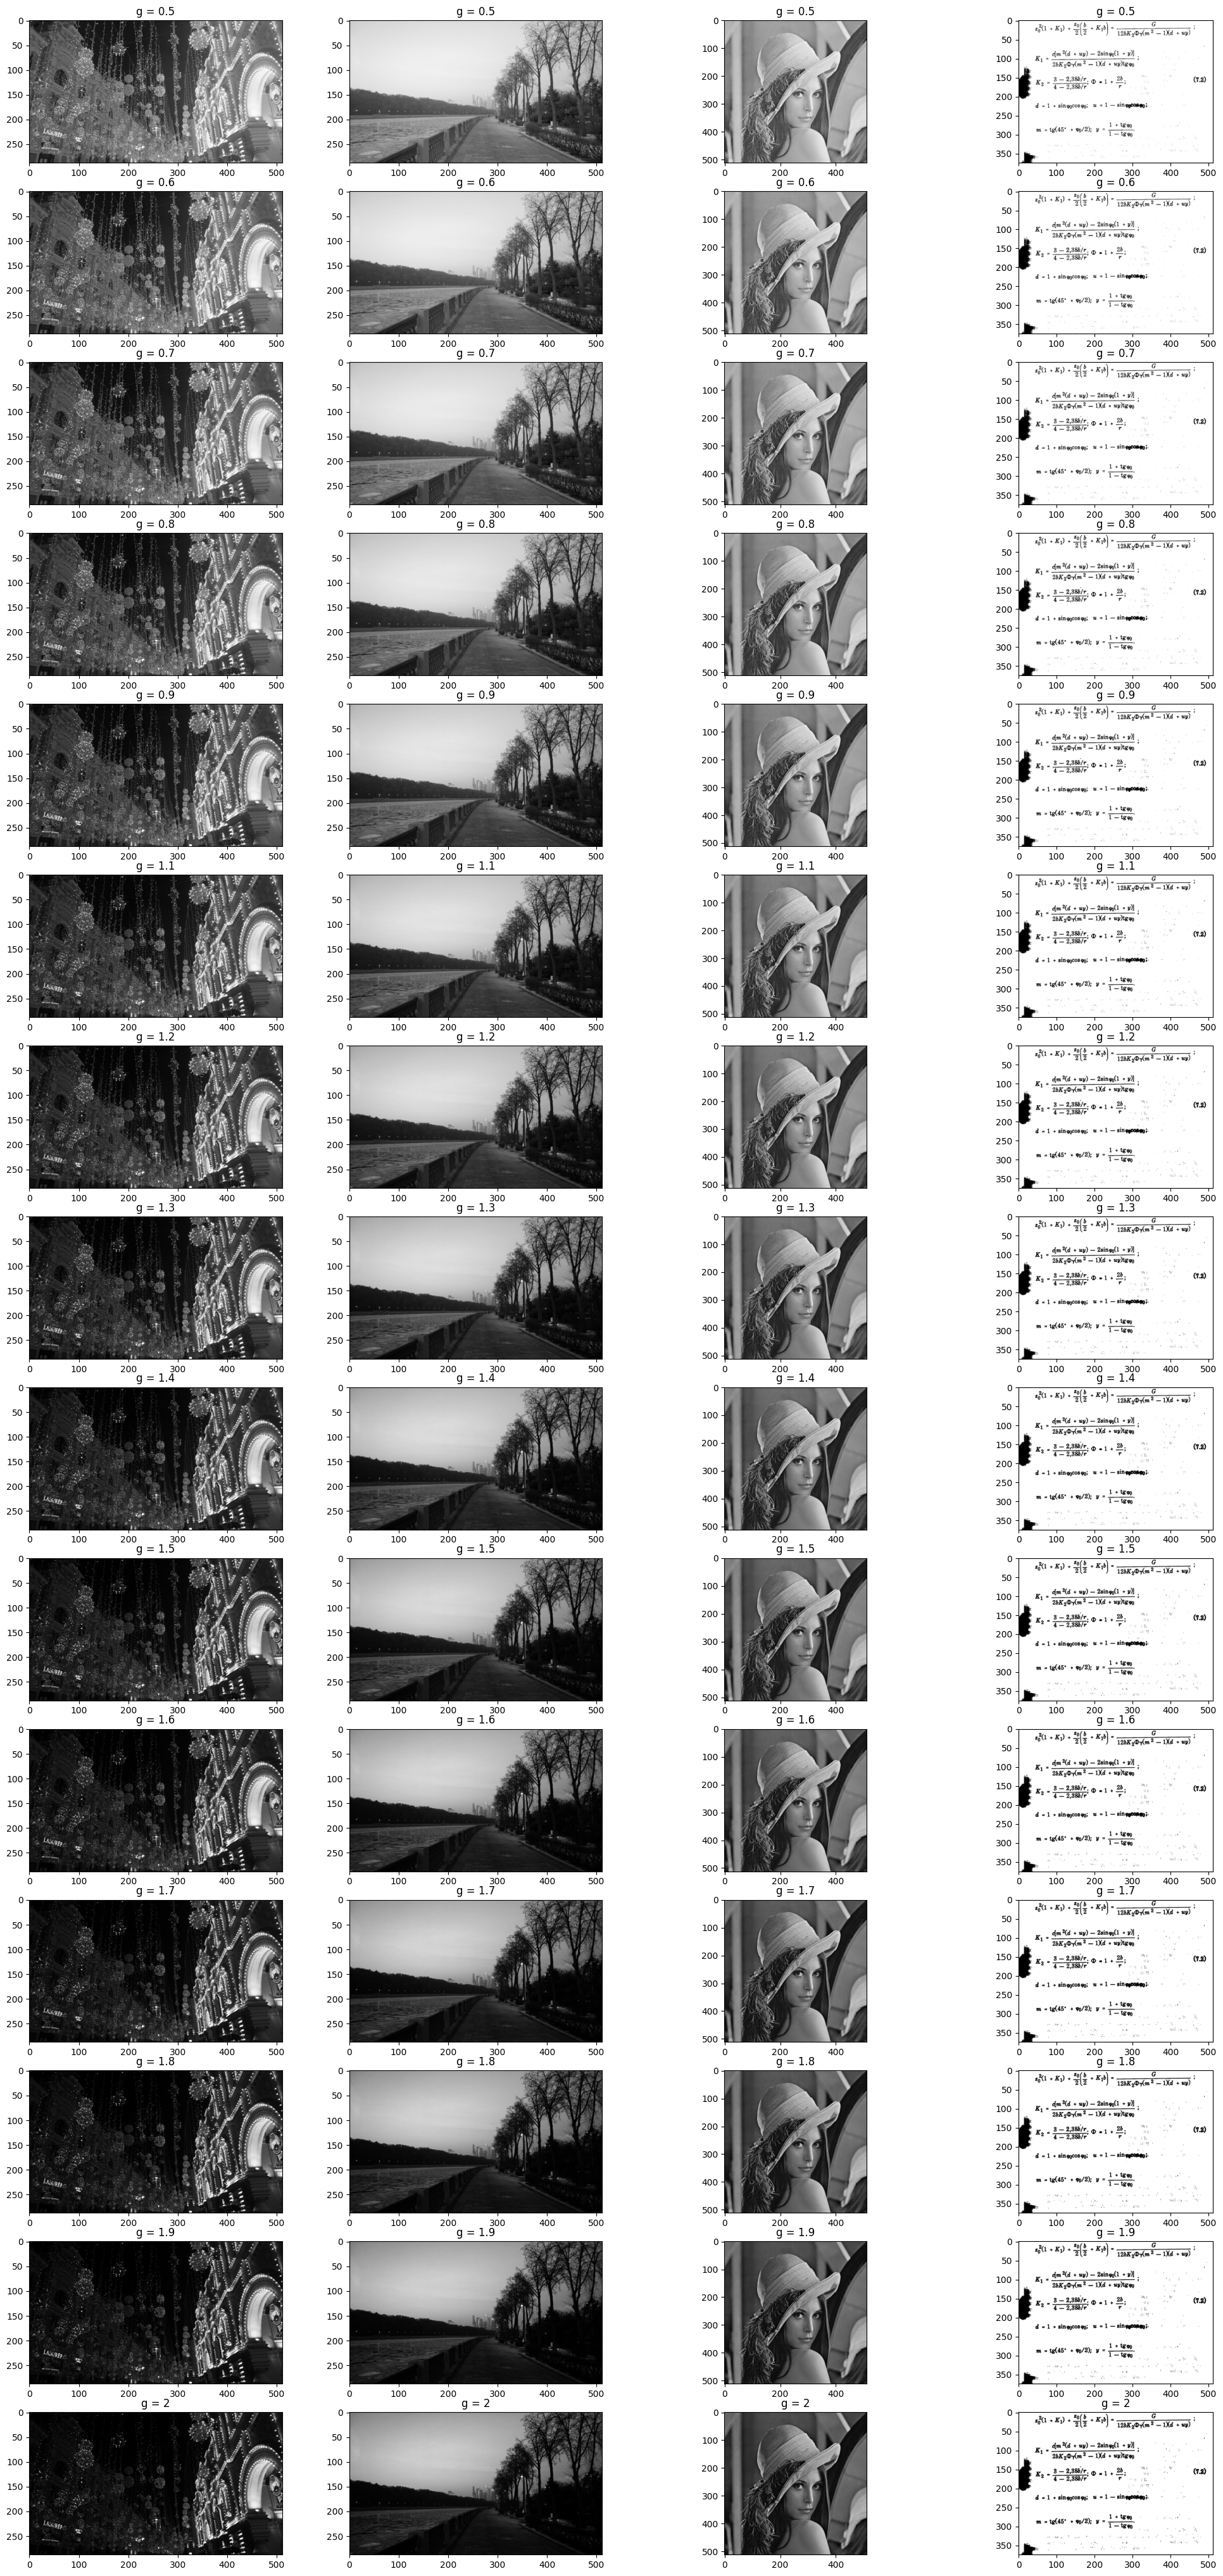

In [9]:
fig, ax = plt.subplots(15, 4, figsize=(25, 52))

g = [0.5, 0.6, 0.7, 0.8, 0.9, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]
for i in range(15):
    for j in range(4):
        ax[i][j].imshow(images_g_compare[i][j], cmap="gray")
        ax[i][j].set_title("g = {}".format(g[i]))